### Import PySpark configurations 

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('kmeans').getOrCreate()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.mllib.clustering import KMeans

In [6]:
rdd = spark.sparkContext.textFile("5000_points.txt")
rdd.take(4)

['664159\t550946', '665845\t557965', '597173\t575538', '618600\t551446']

In [7]:
rdd_split = rdd.map(lambda x: x.split("\t"))
rdd_split.take(4)

[['664159', '550946'],
 ['665845', '557965'],
 ['597173', '575538'],
 ['618600', '551446']]

In [8]:
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])
rdd_split_int.take(4)

[[664159, 550946], [665845, 557965], [597173, 575538], [618600, 551446]]

In [9]:
test = np.array(rdd_split_int.collect())
x = test[:, 0]
y = test[:, 1]

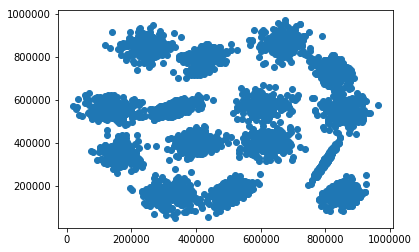

In [10]:
plt.scatter(x, y);

In [11]:
model = KMeans.train(rdd_split_int, 2)
model.computeCost(rdd_split_int)

373726064774389.25

In [12]:
for clst in range(1, 30):
    model = KMeans.train(rdd_split_int, clst)
    print(clst, model.computeCost(rdd_split_int))

1 576807041183705.1
2 363990636937858.56
3 217040622903152.16
4 138250712993153.78
5 107621570727575.19
6 79769015011632.47
7 74112774299617.69
8 57490991271542.734
9 42003294334039.36
10 37201879565825.03
11 30634076844706.023
12 24619111886108.76
13 20016346352257.133
14 19182237401626.03
15 8917659579893.736
16 8727359464809.767
17 8547309868429.2705
18 8351836761273.104
19 8041870990256.3
20 7852837145812.775
21 7789144340018.962
22 7632513449515.794
23 7314320035976.021
24 7261338643726.437
25 7138859252849.393
26 6868552351819.41
27 6605350537369.1875
28 6414542502475.242
29 6267396015131.72


In [13]:
K = 15
model = KMeans.train(rdd_split_int, K)
C = np.array(model.clusterCenters)

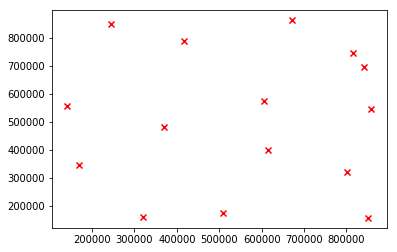

In [14]:
plt.scatter(C[:,0], C[:,1], marker="x", color='r');

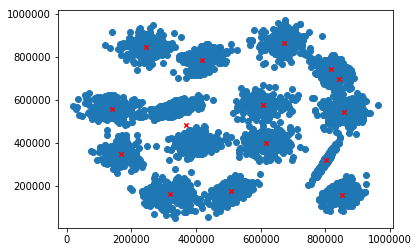

In [15]:
plt.scatter(x, y);
plt.scatter(C[:, 0], C[:, 1], marker='x', c='r', s=20);